In [160]:
import numpy as np
import pandas as pd

from scipy.stats import shapiro, kstest, mannwhitneyu, chi2_contingency, kruskal
from statsmodels.stats.anova import AnovaRM
import scipy

import seaborn as sb

from itertools import combinations, product
from math import sqrt

In [165]:
df_total = pd.read_csv("total.csv")
print(df_total.columns)
print(len(df_total))
df_total.sample(100).head()

Index(['id', 'Filename', 'Account', 'body', 'language', 'Hashtag', 'Sentiment',
       'Correlation_to_the_topic', 'Type_of_media_content',
       'Impression_or_Sentiment', 'Animals', 'Nature', 'People',
       'Natural_Disasters', 'Artifacts', 'Education_Facts_or_News', 'BERTopic',
       'platform', 'mean_h', 'mean_s', 'mean_v', 'dominant_h', 'dominant_s',
       'dominant_v', 'max_colorname'],
      dtype='object')
6905


,id,Filename,Account,body,language,Hashtag,Sentiment,Correlation_to_the_topic,Type_of_media_content,Impression_or_Sentiment,...,Education_Facts_or_News,BERTopic,platform,mean_h,mean_s,mean_v,dominant_h,dominant_s,dominant_v,max_colorname
4739,climatecrisis_7254673036735991066,7254673036735991066.jpg,greentextgaming,Anon worries about the future #greentext #bana...,Language.ENGLISH,climatecrisis,neutral,False,Photo,Neutral,...,False,0_klimaschutz_klimawandel_klimakrise_climatech...,tiktok,0.307424,0.334041,0.368058,0.184314,0.192157,0.184314,gray
251,climatechange_322,climatechange_322.jpg,NASA Earth,Swirling sediment after the storm. 🌊🌧️\n\nFier...,Language.ENGLISH,climatechange,neutral,True,Photo,Neutral,...,True,-1_klimawandel_klimaschutz_climatechange_klima...,instagram,0.580392,0.721569,0.254902,0.580392,0.721569,0.254902,violet
6295,klimawandel_7105802196268207366,7105802196268207366.jpg,optimetron,#umweltschutz #nachhaltigkeit #umwelt #klimasc...,Language.GERMAN,klimawandel,neutral,True,Text,Positive,...,True,0_klimaschutz_klimawandel_klimakrise_climatech...,tiktok,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5093,klimakrise_7224785938260561179,7224785938260561179.jpg,der_neukoellner,Das ist Körperverletzung im Amt. Mit vorherige...,Language.GERMAN,klimakrise,negative,True,Photo,Negative,...,True,0_klimaschutz_klimawandel_klimakrise_climatech...,tiktok,0.563820,0.232208,0.301483,0.788235,0.219608,0.141176,gray
170,climatechange_217,climatechange_217.jpg,Aman Sharma 🐳🇮🇳,"REACHED 300K!!😍 To celebrate, we’re going back...",Language.ENGLISH,climatechange,positive,False,Photo,Positive,...,False,0_klimaschutz_klimawandel_klimakrise_climatech...,instagram,0.211421,0.518325,0.406055,0.145098,0.643137,0.431373,yellow


In [166]:
df_colors = pd.read_csv("unified_color_data_birch.csv")
print(df_colors.columns)
print(df_colors["hashtag"].unique())
df_colors.sample(100).head()

Index(['Unnamed: 0', 'index', 'id', 'platform', 'hashtag', 'n_clusters',
       'mean_r', 'mean_g', 'mean_b', 'mean_h', 'mean_s', 'mean_v',
       'dominant_r', 'dominant_g', 'dominant_b', 'dominant_h', 'dominant_s',
       'dominant_v', 'black', 'gray', 'white', 'orange', 'orange-yellow',
       'yellow', 'yellow-green', 'green', 'green-blue', 'blue', 'blue-violet',
       'violet', 'violet-red', 'red', 'red-orange', 'max_colorname'],
      dtype='object')
['climatechange' 'climatecrisis' 'savetheplanet' 'klimakrise'
 'klimaschutz' 'klimawandel']


,Unnamed: 0,index,id,platform,hashtag,n_clusters,mean_r,mean_g,mean_b,mean_h,...,yellow-green,green,green-blue,blue,blue-violet,violet,violet-red,red,red-orange,max_colorname
142,142,0,7203185178536299822,tiktok,climatechange,16,0.347923,0.427726,0.524197,0.516905,...,0.0,0.000000,0.0,0.000000,0.095052,0.477973,0.0,0.0,0.0,violet
5720,5720,0,klimaschutz_485.jpg,instagram,klimaschutz,9,0.630590,0.598150,0.496801,0.248673,...,0.0,0.012756,0.0,0.170593,0.122803,0.000000,0.0,0.0,0.0,orange-yellow
5943,5943,0,klimawandel_14.jpg,instagram,klimawandel,1,0.721569,0.623295,0.517832,0.086275,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,orange-yellow
5567,5567,0,klimaschutz_330.jpg,instagram,klimaschutz,4,0.727143,0.853498,0.696604,0.312724,...,0.0,0.174133,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,white
1442,1442,0,7254486416472739098,tiktok,klimakrise,10,0.549036,0.498114,0.454596,0.113114,...,0.0,0.000000,0.0,0.012587,0.000000,0.000000,0.0,0.0,0.0,orange-yellow


In [167]:
for idx, row  in df_colors.iterrows():
    id = row["id"]
    if id.endswith(".jpg"):
        newid = id.split('.')[0]
    else:
        newid = row["hashtag"] + "_" + id
    
    df_colors.at[idx, "id"] = newid
print(len(df_colors))
df_colors.sample(25).head()

6623


,Unnamed: 0,index,id,platform,hashtag,n_clusters,mean_r,mean_g,mean_b,mean_h,...,yellow-green,green,green-blue,blue,blue-violet,violet,violet-red,red,red-orange,max_colorname
887,887,0,climatecrisis_7312779674470419744,tiktok,climatecrisis,8,0.312660,0.317166,0.322543,0.175917,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,black
377,377,0,climatechange_7116087961187306757,tiktok,climatechange,4,1.771729,1.771729,1.771729,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,white
1143,1143,0,savetheplanet_6675052941205835014,tiktok,savetheplanet,2,0.271911,0.253395,0.233524,0.052018,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,gray
1622,1622,0,klimakrise_6985883332001156358,tiktok,klimakrise,13,0.286234,0.247846,0.244301,0.171838,...,0.0,0.0,0.000000,0.0,0.000000,0.035482,0.0,0.0,0.000000,black
2895,2895,0,climatechange_88,instagram,climatechange,17,0.317248,0.293805,0.202889,0.184759,...,0.0,0.0,0.028033,0.0,0.014553,0.000000,0.0,0.0,0.006434,orange-yellow


In [168]:
df_complete = pd.merge(df_total, df_colors, on="id")
print(df_complete.columns)
print(len(df_complete))
print(df_complete["Hashtag"].unique())
df_complete.head()

Index(['id', 'Filename', 'Account', 'body', 'language', 'Hashtag', 'Sentiment',
       'Correlation_to_the_topic', 'Type_of_media_content',
       'Impression_or_Sentiment', 'Animals', 'Nature', 'People',
       'Natural_Disasters', 'Artifacts', 'Education_Facts_or_News', 'BERTopic',
       'platform_x', 'mean_h_x', 'mean_s_x', 'mean_v_x', 'dominant_h_x',
       'dominant_s_x', 'dominant_v_x', 'max_colorname_x', 'Unnamed: 0',
       'index', 'platform_y', 'hashtag', 'n_clusters', 'mean_r', 'mean_g',
       'mean_b', 'mean_h_y', 'mean_s_y', 'mean_v_y', 'dominant_r',
       'dominant_g', 'dominant_b', 'dominant_h_y', 'dominant_s_y',
       'dominant_v_y', 'black', 'gray', 'white', 'orange', 'orange-yellow',
       'yellow', 'yellow-green', 'green', 'green-blue', 'blue', 'blue-violet',
       'violet', 'violet-red', 'red', 'red-orange', 'max_colorname_y'],
      dtype='object')
6623
['climatechange' 'climatecrisis' 'klimakrise' 'klimaschutz' 'klimawandel'
 'savetheplanet']


,id,Filename,Account,body,language,Hashtag,Sentiment,Correlation_to_the_topic,Type_of_media_content,Impression_or_Sentiment,...,yellow-green,green,green-blue,blue,blue-violet,violet,violet-red,red,red-orange,max_colorname_y
0,climatechange_1,climatechange_1.jpg,NASA Earth,Not your typical ice cube. 🧊\n\nAlthough it is...,Language.ENGLISH,climatechange,neutral,True,Photo,Neutral,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,gray
1,climatechange_2,climatechange_2.jpg,NASA,Not your typical ice cube. 🧊\n\nAlthough it is...,Language.ENGLISH,climatechange,neutral,True,Photo,Neutral,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,gray
2,climatechange_3,climatechange_3.jpg,Pubity,2023 will be the hottest year recorded in hist...,Language.ENGLISH,climatechange,positive,True,Text,Negative,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,orange
3,climatechange_4,climatechange_4.jpg,MEMEZAR • MEMES & MEME-CULTURE,I just know someone would try drinking them to...,Language.ENGLISH,climatechange,neutral,True,Photo,Neutral,...,0.060279,0.028799,0.0,0.0,0.000000,0.0,0.0,0.0,0.000077,white
4,climatechange_5,climatechange_5.jpg,Pubity,"According to one professor, we can stop global...",Language.ENGLISH,climatechange,positive,True,Photo,Neutral,...,0.000000,0.008425,0.0,0.0,0.036305,0.0,0.0,0.0,0.000000,gray


In [169]:
colornames = ['black', 'gray', 'white', 'orange', 'orange-yellow',
       'yellow', 'yellow-green', 'green', 'green-blue', 'blue', 'blue-violet',
       'violet', 'violet-red', 'red', 'red-orange']

colors_to_colornames = {
       'black':(0.066,0.066,0.066),
       'gray':(0.466,0.466,0.466),
       'white':(0.943,0.943,0.943), 
       'orange': (0.906, 0.003, 0.352), 
       'orange-yellow': (0.86,0.21,0.001),
       'yellow': (0.617,0.426,0.039), 
       'yellow-green': (0.466,0.51,0.024), 
       'green': (0.028, 0.566, 0.047), 
       'green-blue':(0.019, 0.555,0.406), 
       'blue': (0.001,0.67,0.663), 
       'blue-violet':(0.065,0.657,0.788),
       'violet': (0.002,0.627,0.939), 
       'violet-red':(0.207,0.44,0.995), 
       'red':(0.731, 0.15,0.998), 
       'red-orange': (0.873, 0.003, 0.618)
}

# Descriptive Statistics

In [170]:
num_total = len(df_total)
num_insta = len(df_total.loc[df_total["platform"] == "instagram"])
num_tiktok = len(df_total.loc[df_total["platform"] == "tiktok"])

print(f"We have {num_total} posts, of which {num_insta} are from Instagram and {num_tiktok} are from Tiktok.")

We have 6905 posts, of which 3802 are from Instagram and 3103 are from Tiktok.


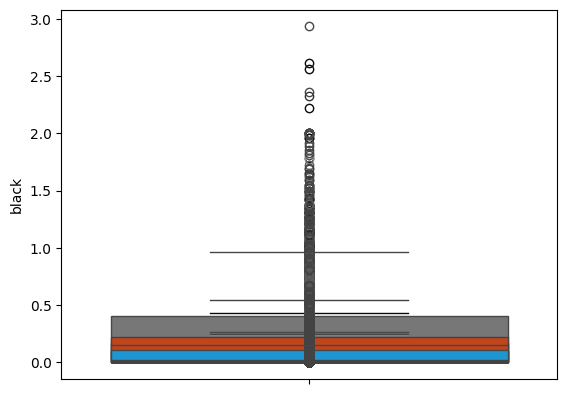

In [173]:
for color in colornames:
    sb.boxplot(df_complete[color], color=colors_to_colornames[color])
    

## Platform differences

In [141]:
insta_plot_color = (245/255, 133/255, 41/255)
tiktok_plot_color = (238/255, 29/255, 82/255)

In [177]:
df_instagram = df_total.loc[df_total["platform"] == "instagram"]
df_tiktok = df_total.loc[df_total["platform"] == "tiktok"]

print(df_instagram)
print(df_tiktok)

df_c_instagram = df_colors.loc[df_colors["platform"] == "instagram"]
df_c_tiktok = df_colors.loc[df_colors["platform"] == "tiktok"]

                     id               Filename  \
0       climatechange_1    climatechange_1.jpg   
1       climatechange_2    climatechange_2.jpg   
2       climatechange_3    climatechange_3.jpg   
3       climatechange_4    climatechange_4.jpg   
4       climatechange_5    climatechange_5.jpg   
...                 ...                    ...   
3797  savetheplanet_696  savetheplanet_696.jpg   
3798  savetheplanet_697  savetheplanet_697.jpg   
3799  savetheplanet_698  savetheplanet_698.jpg   
3800  savetheplanet_699  savetheplanet_699.jpg   
3801  savetheplanet_700  savetheplanet_700.jpg   

                             Account  \
0                         NASA Earth   
1                               NASA   
2                             Pubity   
3     MEMEZAR • MEMES & MEME-CULTURE   
4                             Pubity   
...                              ...   
3797                 Snap_Sri _Lanka   
3798         The Undisputable Vegans   
3799         The Undisputable Vegans   

### Computing average RGB values for each platform

In [178]:
mean_r_ig = np.mean(df_c_instagram.dropna()["mean_r"]) * 255
mean_g_ig = np.mean(df_c_instagram.dropna()["mean_g"]) * 255
mean_b_ig = np.mean(df_c_instagram.dropna()["mean_b"]) * 255

mean_r_tt = np.mean(df_c_tiktok.dropna()["mean_r"]) * 255
mean_g_tt = np.mean(df_c_tiktok.dropna()["mean_g"]) * 255
mean_b_tt = np.mean(df_c_tiktok.dropna()["mean_b"]) * 255

print(f"MEAN RGB INSTA: {mean_r_ig}, {mean_g_ig}, {mean_b_ig}")
print(f"MEAN RGB TIKTOK: {mean_r_tt}, {mean_g_tt}, {mean_b_tt}")

MEAN RGB INSTA: 130.67807328377359, 128.55029756432108, 123.905406390105
MEAN RGB TIKTOK: 121.06877198857114, 112.35083661099353, 110.6472009513286


### Comparing average h, s, v values between platforms

Mean H Instagram: 0.3269368464141073
Mean H Tiktok: 0.3638275599344696
Effect size: 0.06161344241577582


MannwhitneyuResult(statistic=5015054.0, pvalue=1.7808711859184778e-05)

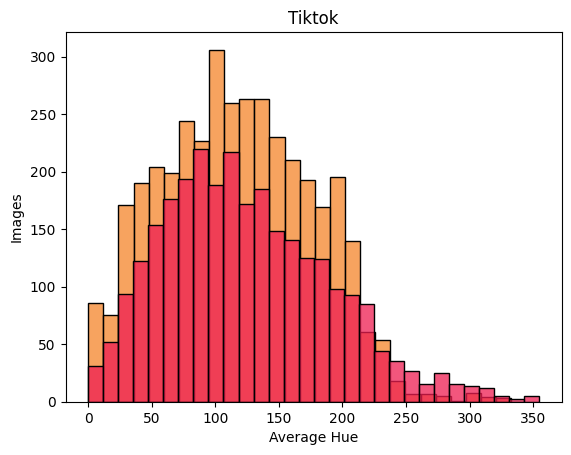

In [181]:
total_mean_h = df_total.dropna()["mean_h"]
instagram_mean_h = df_instagram.dropna()["mean_h"]
tiktok_mean_h = df_tiktok.dropna()["mean_h"]

sb.histplot(instagram_mean_h*360%360, color=insta_plot_color, binwidth=12).set(title='Instagram',xlabel='Average Hue', ylabel="Images")
sb.histplot(tiktok_mean_h*360%360, color=tiktok_plot_color, binwidth=12).set(title='Tiktok',xlabel='Average Hue', ylabel="Images")
print(f"Mean H Instagram: {np.mean(instagram_mean_h)}")
print(f"Mean H Tiktok: {np.mean(tiktok_mean_h)}")

res = mannwhitneyu(instagram_mean_h, tiktok_mean_h)
mwu_stat = res.statistic
p = res.pvalue
effect_size = 1- (2*mwu_stat)/(len(instagram_mean_h) * len(tiktok_mean_h))
print(f"Effect size: {effect_size}")
res

KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)
p=0.0
KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)
p=0.0
Mean S Instagram: 0.3111618243426425
Mean S Tiktok: 0.30379354053769997
Effect size: -0.033714378415881985


MannwhitneyuResult(statistic=5524518.0, pvalue=0.01888214367296466)

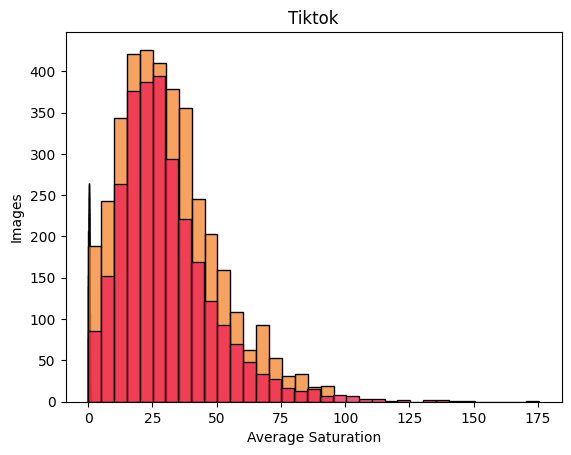

In [182]:
total_mean_s = df_total.dropna()["mean_s"]
instagram_mean_s = df_instagram.dropna()["mean_s"]
tiktok_mean_s = df_tiktok.dropna()["mean_s"]

insta_s_res_normal = kstest(instagram_mean_s, "norm")
print(insta_s_res_normal)
print(f"p={insta_s_res_normal.pvalue}")
sb.histplot(instagram_mean_s, color=insta_plot_color)


tok_s_res_normal = kstest(tiktok_mean_s, "norm")
print(tok_s_res_normal)
print(f"p={tok_s_res_normal.pvalue}")
sb.histplot(instagram_mean_s*100, color=insta_plot_color, binwidth=5).set(title='Instagram',xlabel='Average Saturation', ylabel="Images")
sb.histplot(tiktok_mean_s*100, color=tiktok_plot_color, binwidth=5).set(title='Tiktok',xlabel='Average Saturation', ylabel="Images")


print(f"Mean S Instagram: {np.mean(instagram_mean_s)}")
print(f"Mean S Tiktok: {np.mean(tiktok_mean_s)}")

res = mannwhitneyu(instagram_mean_s, tiktok_mean_s)
mwu_stat = res.statistic
p = res.pvalue

effect_size = 1- (2*mwu_stat)/(len(instagram_mean_s) * len(tiktok_mean_s))
print(f"Effect size: {effect_size}")
res

Mean V Instagram: 0.5857678035515773
Mean V Tiktok: 0.5272415773838669
Effect size: -0.2001465289333364


MannwhitneyuResult(statistic=6413987.5, pvalue=3.716348002610858e-44)

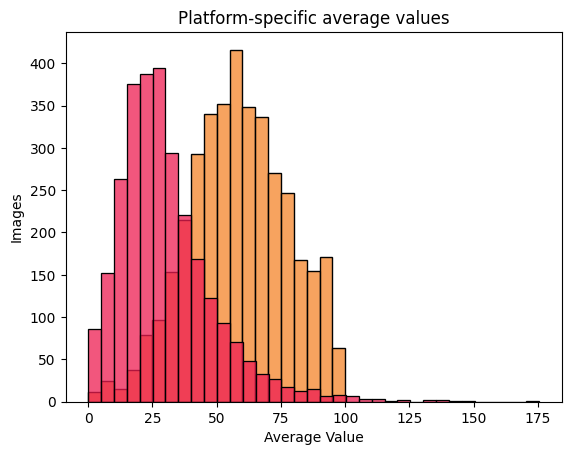

In [183]:
total_mean_v = df_total.dropna()["mean_v"]
instagram_mean_v = df_instagram.dropna()["mean_v"]
tiktok_mean_v = df_tiktok.dropna()["mean_v"]

print(f"Mean V Instagram: {np.mean(instagram_mean_v)}")
print(f"Mean V Tiktok: {np.mean(tiktok_mean_v)}")

sb.histplot(instagram_mean_v*100, color=insta_plot_color, binwidth=5).set(title='Instagram',xlabel='Average Value', ylabel="Images")
sb.histplot(tiktok_mean_s*100, color=tiktok_plot_color, binwidth=5).set(title='Platform-specific average values',xlabel='Average Value', ylabel="Images")


res = mannwhitneyu(instagram_mean_v, tiktok_mean_v)
mwu_stat = res.statistic
p = res.pvalue

effect_size = 1- (2*mwu_stat)/(len(instagram_mean_v) * len(tiktok_mean_v))
print(f"Effect size: {effect_size}")
res

### Comparing h, s, v values of most frequent colors in an image between platforms

Mean Dom H Instagram: 0.30541761655888294
Mean Dom H Tiktok: 0.2725789393117076
Effect size: -0.07681673142992285


MannwhitneyuResult(statistic=5754871.5, pvalue=7.892374912495207e-08)

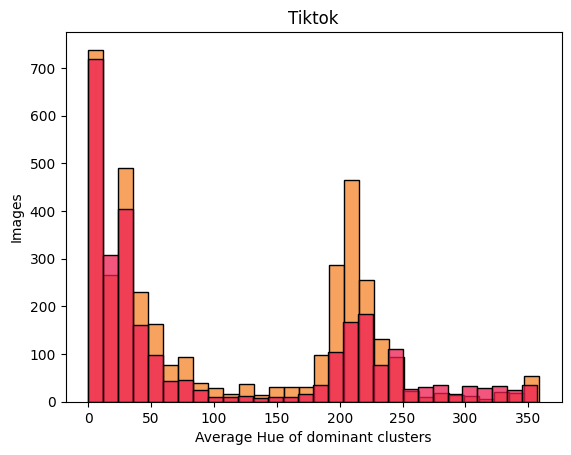

In [184]:
total_dom_h = df_total.dropna()["dominant_h"]
instagram_dom_h = df_instagram.dropna()["dominant_h"]
tiktok_dom_h = df_tiktok.dropna()["dominant_h"]

#insta_h_res_normal = kstest(instagram_mean_s, "norm")
#print(insta_s_res_normal)

#tok_s_res_normal = kstest(tiktok_mean_s, "norm")
#print(tok_s_res_normal)
sb.histplot(instagram_dom_h*360%360, color=insta_plot_color, binwidth=12).set(title='Instagram',xlabel='Average Hue of dominant clusters', ylabel="Images")
sb.histplot(tiktok_dom_h*360%360, color=tiktok_plot_color, binwidth=12).set(title='Tiktok',xlabel='Average Hue of dominant clusters', ylabel="Images")


print(f"Mean Dom H Instagram: {np.mean(instagram_dom_h)}")
print(f"Mean Dom H Tiktok: {np.mean(tiktok_dom_h)}")

res = mannwhitneyu(instagram_dom_h, tiktok_dom_h)
mwu_stat = res.statistic
p = res.pvalue

effect_size = 1- (2*mwu_stat)/(len(instagram_dom_h) * len(tiktok_dom_h))
print(f"Effect size: {effect_size}")
res

Mean Dom S Instagram: 0.2956188644717048
Mean Dom S Tiktok: 0.24472508662797976
Effect size: -0.0771053546960081


MannwhitneyuResult(statistic=5756414.0, pvalue=7.118498304710409e-08)

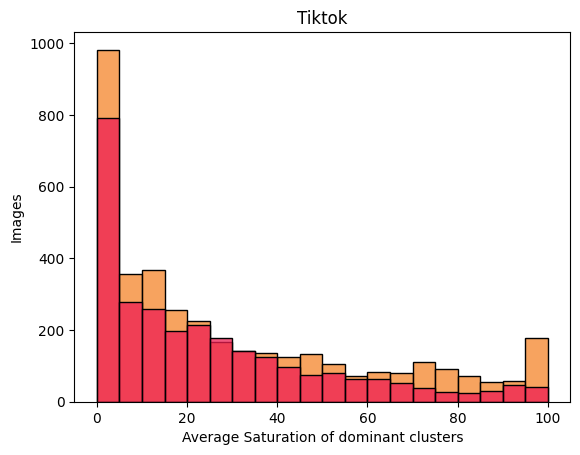

In [185]:
total_dom_s = df_total.dropna()["dominant_s"]
instagram_dom_s = df_instagram.dropna()["dominant_s"]
tiktok_dom_s = df_tiktok.dropna()["dominant_s"]

#insta_h_res_normal = kstest(instagram_mean_s, "norm")
#print(insta_s_res_normal)
#tok_s_res_normal = kstest(tiktok_mean_s, "norm")
#print(tok_s_res_normal)
sb.histplot(instagram_dom_s*100, color=insta_plot_color, binwidth=5).set(title='Instagram',xlabel='Average Saturation of dominant clusters', ylabel="Images")
sb.histplot(tiktok_dom_s*100, color=tiktok_plot_color, binwidth=5).set(title='Tiktok',xlabel='Average Saturation of dominant clusters', ylabel="Images")


print(f"Mean Dom S Instagram: {np.mean(instagram_dom_s)}")
print(f"Mean Dom S Tiktok: {np.mean(tiktok_dom_s)}")

res = mannwhitneyu(instagram_dom_s, tiktok_dom_s)
mwu_stat = res.statistic
p = res.pvalue

effect_size = 1- (2*mwu_stat)/(len(instagram_dom_s) * len(tiktok_dom_s))
print(f"Effect size: {effect_size}")
res

Mean Dom V Instagram: 0.6140811505197914
Mean Dom V Tiktok: 0.4674452747742105
Effect size: -0.26752111627691133


MannwhitneyuResult(statistic=6774060.0, pvalue=1.5476351480870233e-77)

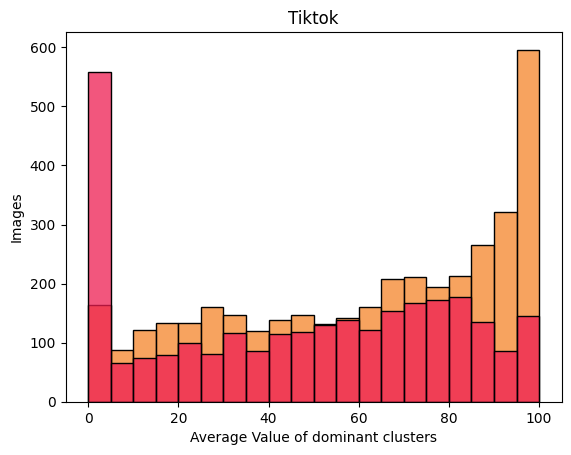

In [186]:
total_dom_v = df_total.dropna()["dominant_v"]
instagram_dom_v = df_instagram.dropna()["dominant_v"]
tiktok_dom_v = df_tiktok.dropna()["dominant_v"]

#insta_h_res_normal = kstest(instagram_mean_s, "norm")
#print(insta_s_res_normal)
#tok_s_res_normal = kstest(tiktok_mean_s, "norm")
#print(tok_s_res_normal)
sb.histplot(instagram_dom_v*100, color=insta_plot_color, binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(tiktok_dom_v*100, color=tiktok_plot_color, binwidth=5).set(title='Tiktok',xlabel='Average Value of dominant clusters', ylabel="Images")


print(f"Mean Dom V Instagram: {np.mean(instagram_dom_v)}")
print(f"Mean Dom V Tiktok: {np.mean(tiktok_dom_v)}")

res = mannwhitneyu(instagram_dom_v, tiktok_dom_v)
mwu_stat = res.statistic
p = res.pvalue

effect_size = 1- (2*mwu_stat)/(len(instagram_dom_v) * len(tiktok_dom_v))
print(f"Effect size: {effect_size}")
res

### Comparing frequency of color names between platforms (unfinished)

In [187]:
# first, make contingency table
instagram_dominant_colornames = df_instagram["max_colorname"]
tiktok_dominant_colornames = df_tiktok["max_colorname"]

platform_colorname_contingency_table = pd.crosstab(index=df_total["platform"], columns=df_total["max_colorname"])
platform_colorname_contingency_table

max_colorname,black,blue,blue-violet,gray,green,green-blue,orange,orange-yellow,red,red-orange,violet,violet-red,white,yellow,yellow-green
platform,,,,,,,,,,,,,,,
instagram,328,58,311,988,65,34,195,478,12,23,397,20,583,169,141
tiktok,665,18,103,745,20,9,176,487,11,26,224,30,105,127,75


In [188]:
#perform chi squared test of independence
res = chi2_contingency(platform_colorname_contingency_table, correction=False)
sample_size = platform_colorname_contingency_table.sum().sum()
print(sample_size)
cramers_V = sqrt((res.statistic/sample_size))
print(cramers_V)
res

6623
0.2983906636889709


Chi2ContingencyResult(statistic=589.691972694579, pvalue=8.301409034363869e-117, dof=14, expected_freq=array([[570.04167296,  43.62856711, 237.66087876, 994.84614223,
         48.79510796,  24.68458403, 212.97629473, 553.96799034,
         13.20338215,  28.12894459, 356.49131813,  28.70300468,
        394.95334441, 169.92178771, 123.99698022],
       [422.95832704,  32.37143289, 176.33912124, 738.15385777,
         36.20489204,  18.31541597, 158.02370527, 411.03200966,
          9.79661785,  20.87105541, 264.50868187,  21.29699532,
        293.04665559, 126.07821229,  92.00301978]]))

In [114]:
#chi-squared post-hoc test
#https://neuhofmo.github.io/chi-square-and-post-hoc-in-python/
#thank you for letting me steal your code

# gathering all combinations for post-hoc chi2
all_combinations = list(product(platform_colorname_contingency_table.index, platform_colorname_contingency_table.columns))
print(all_combinations)
print("Significance results:")
for comb in all_combinations:
    # subset df into a dataframe containing only the pair "comb"
    new_df = platform_colorname_contingency_table[(platform_colorname_contingency_table.index == comb[0]) | (platform_colorname_contingency_table.index == comb[1])]
    # running chi2 test
    chi2, p, dof, ex = chi2_contingency(new_df, correction=False)
    print(f"Chi2 result for pair {comb}: {chi2}, p-value: {p}")


[('instagram', 'black'), ('instagram', 'blue'), ('instagram', 'blue-violet'), ('instagram', 'gray'), ('instagram', 'green'), ('instagram', 'green-blue'), ('instagram', 'orange'), ('instagram', 'orange-yellow'), ('instagram', 'red'), ('instagram', 'red-orange'), ('instagram', 'violet'), ('instagram', 'violet-red'), ('instagram', 'white'), ('instagram', 'yellow'), ('instagram', 'yellow-green'), ('tiktok', 'black'), ('tiktok', 'blue'), ('tiktok', 'blue-violet'), ('tiktok', 'gray'), ('tiktok', 'green'), ('tiktok', 'green-blue'), ('tiktok', 'orange'), ('tiktok', 'orange-yellow'), ('tiktok', 'red'), ('tiktok', 'red-orange'), ('tiktok', 'violet'), ('tiktok', 'violet-red'), ('tiktok', 'white'), ('tiktok', 'yellow'), ('tiktok', 'yellow-green')]
Significance results:
Chi2 result for pair ('instagram', 'black'): 0.0, p-value: 1.0
Chi2 result for pair ('instagram', 'blue'): 0.0, p-value: 1.0
Chi2 result for pair ('instagram', 'blue-violet'): 0.0, p-value: 1.0
Chi2 result for pair ('instagram', 'gr

### Comparing average h, s, v values of posts with positive, negative, or neutral *textual* sentiment

In [189]:
print(df_total["Sentiment"].unique())

df_t_positive = df_total.loc[df_total["Sentiment"] == "positive"]
df_t_neutral = df_total.loc[df_total["Sentiment"] == "neutral"]
df_t_negative = df_total.loc[df_total["Sentiment"] == "negative"]

['neutral' 'positive' 'negative']


2       0.064709
4       0.110547
10      0.523036
14      0.361116
15      0.312974
          ...   
6886    0.320867
6889    0.136219
6899    0.429402
6902    0.168220
6903    0.266041
Name: mean_h, Length: 1941, dtype: float64
KruskalResult(statistic=5.037937042890183, pvalue=0.08054264192557052)
Mean positive 0.33247848551133646
Mean neutral 0.3504892025424065
Mean negative 0.33914785315600354


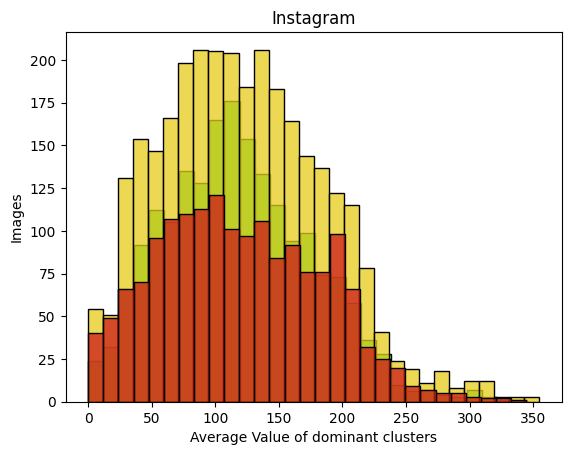

In [192]:
mean_h_pos_t = df_t_positive["mean_h"].dropna()
mean_h_neu_t = df_t_neutral["mean_h"].dropna()
mean_h_neg_t = df_t_negative["mean_h"].dropna()
print(mean_h_pos_t)
sb.histplot(mean_h_pos_t*360%360, color=(0.1,0.8,0.1), binwidth=12).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(mean_h_neu_t*360%360, color=(0.9,0.8,0.1), binwidth=12).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(mean_h_neg_t*360%360, color=(0.8,0.1,0.1), binwidth=12).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")

res = kruskal(mean_h_pos_t, mean_h_neu_t, mean_h_neg_t)
print(res)

print(f"Mean positive {np.mean(mean_h_pos_t)}")
print(f"Mean neutral {np.mean(mean_h_neu_t)}")
print(f"Mean negative {np.mean(mean_h_neg_t)}")


2       0.064709
4       0.110547
10      0.523036
14      0.361116
15      0.312974
          ...   
6886    0.320867
6889    0.136219
6899    0.429402
6902    0.168220
6903    0.266041
Name: mean_h, Length: 1941, dtype: float64
Kruskal-Wallis for all KruskalResult(statistic=6.039894281280925, pvalue=0.04880379803133947)
Main effect size: 0.0009119574635785784
Mann-Whitney-U for positive-neutral: MannwhitneyuResult(statistic=3034351.5, pvalue=0.014394845421779339)
Effect size pos-neu: -0.041154106069098306
Mann-Whitney-U for negative-neutral: MannwhitneyuResult(statistic=2570740.5, pvalue=0.26232692721363293)
Effect size neg-neu: -0.019722981009461016
Mann-Whitney-U for positive-negative: MannwhitneyuResult(statistic=1664459.5, pvalue=0.2645189986377705)
Effect size pos-neg: -0.021473246354104747
Effect size: 0.11792123384086295
Mean for positive : 0.3133710260293308
Mean for neutral : 0.3036888144559103
Mean for negative : 0.3094462374866689


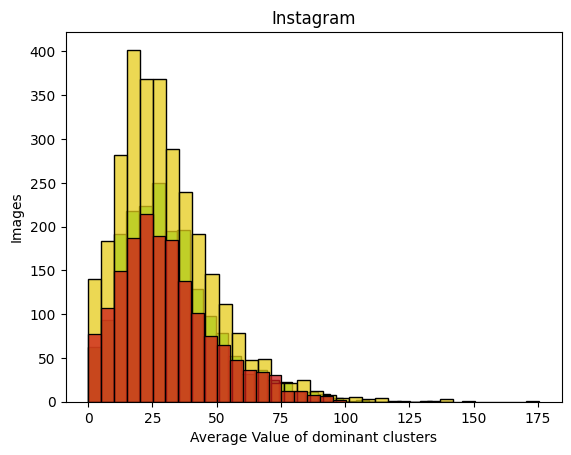

In [200]:
mean_s_pos_t = df_t_positive["mean_s"].dropna()
mean_s_neu_t = df_t_neutral["mean_s"].dropna()
mean_s_neg_t = df_t_negative["mean_s"].dropna()
print(mean_h_pos_t)
sb.histplot(mean_s_pos_t*100, color=(0.1,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(mean_s_neu_t*100, color=(0.9,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(mean_s_neg_t*100, color=(0.8,0.1,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
res = kruskal(mean_s_pos_t, mean_s_neu_t, mean_s_neg_t)
print(f"Kruskal-Wallis for all {res}")
eps = res.statistic / (len(df_total["mean_s"].dropna()-1))
print(f"Main effect size: {eps}")

res_pos_neu = mannwhitneyu(mean_s_pos_t, mean_s_neu_t)
print(f"Mann-Whitney-U for positive-neutral: {res_pos_neu}")
effect_size_pos_neu = 1- (2*res_pos_neu.statistic)/(len(mean_s_pos_t) * len(mean_s_neu_t))
print(f"Effect size pos-neu: {effect_size_pos_neu}")

res_neg_neu = mannwhitneyu(mean_s_neg_t, mean_s_neu_t)
print(f"Mann-Whitney-U for negative-neutral: {res_neg_neu}")
effect_size_neg_neu = 1- (2*res_neg_neu.statistic)/(len(mean_s_neg_t) * len(mean_s_neu_t))
print(f"Effect size neg-neu: {effect_size_neg_neu}")

res_pos_neg = mannwhitneyu(mean_s_pos_t, mean_s_neg_t)
print(f"Mann-Whitney-U for positive-negative: {res_pos_neg}")
effect_size_pos_neg = 1- (2*res_pos_neg.statistic)/(len(mean_s_pos_t) * len(mean_s_neg_t))
print(f"Effect size pos-neg: {effect_size_pos_neg}")



print(f"Mean for positive : {np.mean(mean_s_pos_t)}")
print(f"Mean for neutral : {np.mean(mean_s_neu_t)}")
print(f"Mean for negative : {np.mean(mean_s_neg_t)}")


In [ ]:
mean_r_ig = np.mean(df_c_instagram.dropna()["mean_r"]) * 255
mean_g_ig = np.mean(df_c_instagram.dropna()["mean_g"]) * 255
mean_b_ig = np.mean(df_c_instagram.dropna()["mean_b"]) * 255

mean_r_tt = np.mean(df_c_tiktok.dropna()["mean_r"]) * 255
mean_g_tt = np.mean(df_c_tiktok.dropna()["mean_g"]) * 255
mean_b_tt = np.mean(df_c_tiktok.dropna()["mean_b"]) * 255

print(f"MEAN RGB INSTA: {mean_r_ig}, {mean_g_ig}, {mean_b_ig}")
print(f"MEAN RGB TIKTOK: {mean_r_tt}, {mean_g_tt}, {mean_b_tt}")

MEAN RGB INSTA: 130.67807328377359, 128.55029756432108, 123.905406390105
MEAN RGB TIKTOK: 121.06877198857114, 112.35083661099353, 110.6472009513286


2       0.064709
4       0.110547
10      0.523036
14      0.361116
15      0.312974
          ...   
6886    0.320867
6889    0.136219
6899    0.429402
6902    0.168220
6903    0.266041
Name: mean_h, Length: 1941, dtype: float64
Kruskal-Wallis for all KruskalResult(statistic=11.87280949961232, pvalue=0.0026415094871062527)
epsilon=0.0017926633700154492
Mann-Whitney-U for positive-neutral: MannwhitneyuResult(statistic=3043405.5, pvalue=0.008488538454560737)
Effect size pos-neu: -0.04426073668732089
Mann-Whitney-U for negative-neutral: MannwhitneyuResult(statistic=2656305.5, pvalue=0.0022894748897582407)
Effect size pos-neu: -0.05366362841050165
Mann-Whitney-U for positive-negative: MannwhitneyuResult(statistic=1614460.5, pvalue=0.632220975407112)
Effect size pos-neu: 0.009210973264611622
Mean for positive : 0.5625949421846337
Mean for neutral : 0.5552625144406407
Mean for negative : 0.5683557626660949


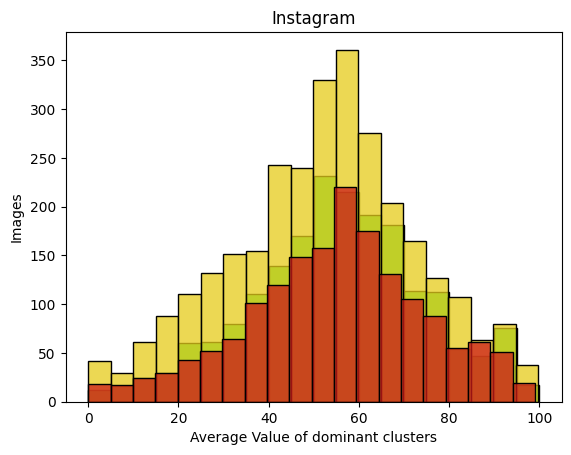

In [201]:
mean_v_pos_t = df_t_positive["mean_v"].dropna()
mean_v_neu_t = df_t_neutral["mean_v"].dropna()
mean_v_neg_t = df_t_negative["mean_v"].dropna()
print(mean_h_pos_t)
sb.histplot(mean_v_pos_t*100%100, color=(0.1,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(mean_v_neu_t*100%100, color=(0.9,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(mean_v_neg_t*100%100, color=(0.8,0.1,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
res = kruskal(mean_v_pos_t, mean_v_neu_t, mean_v_neg_t)
print(f"Kruskal-Wallis for all {res}")
eps = res.statistic / (len(df_total["mean_v"].dropna()-1))
print(f"epsilon={eps}")


res_pos_neu = mannwhitneyu(mean_v_pos_t, mean_v_neu_t)
print(f"Mann-Whitney-U for positive-neutral: {res_pos_neu}")
effect_size_pos_neu = 1- (2*res_pos_neu.statistic)/(len(mean_v_pos_t) * len(mean_v_neu_t))
print(f"Effect size pos-neu: {effect_size_pos_neu}")

res_neg_neu = mannwhitneyu(mean_v_neg_t, mean_v_neu_t)
print(f"Mann-Whitney-U for negative-neutral: {res_neg_neu}")
effect_size_neg_neu = 1- (2*res_neg_neu.statistic)/(len(mean_v_neg_t) * len(mean_v_neu_t))
print(f"Effect size pos-neu: {effect_size_neg_neu}")

res_pos_neg = mannwhitneyu(mean_v_pos_t, mean_v_neg_t)
print(f"Mann-Whitney-U for positive-negative: {res_pos_neg}")
effect_size_pos_neg = 1- (2*res_pos_neg.statistic)/(len(mean_v_pos_t) * len(mean_v_neg_t))
print(f"Effect size pos-neu: {effect_size_pos_neg}")


print(f"Mean for positive : {np.mean(mean_v_pos_t)}")
print(f"Mean for neutral : {np.mean(mean_v_neu_t)}")
print(f"Mean for negative : {np.mean(mean_v_neg_t)}")

### Doing the same for the most frequent colors in an image

2       0.064709
4       0.110547
10      0.523036
14      0.361116
15      0.312974
          ...   
6886    0.320867
6889    0.136219
6899    0.429402
6902    0.168220
6903    0.266041
Name: mean_h, Length: 1941, dtype: float64
KruskalResult(statistic=4.835047980062101, pvalue=0.08914206106833612)
Mean positive: 0.2956773848127607
Mean neutral: 0.28885363003010056
Mean negative: 0.29001856847563323


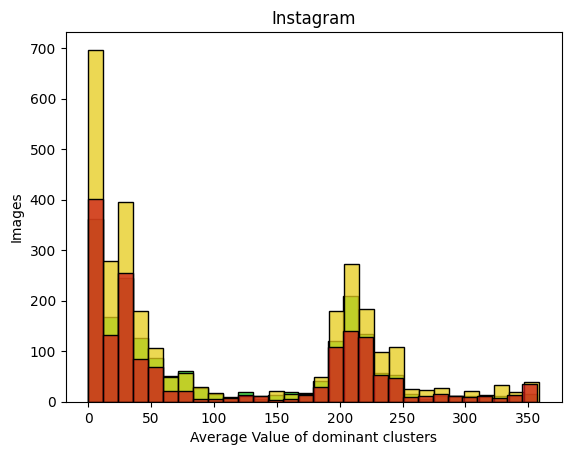

In [204]:
dom_h_pos_t = df_t_positive["dominant_h"].dropna()
dom_h_neu_t = df_t_neutral["dominant_h"].dropna()
dom_h_neg_t = df_t_negative["dominant_h"].dropna()
print(mean_h_pos_t)
sb.histplot(dom_h_pos_t*360%360, color=(0.1,0.8,0.1), binwidth=12).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(dom_h_neu_t*360%360, color=(0.9,0.8,0.1), binwidth=12).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(dom_h_neg_t*360%360, color=(0.8,0.1,0.1), binwidth=12).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")

res = kruskal(dom_h_pos_t, dom_h_neu_t, dom_h_neg_t)
print(res)

print(f"Mean positive: {np.mean(dom_h_pos_t)}")
print(f"Mean neutral: {np.mean(dom_h_neu_t)}")
print(f"Mean negative: {np.mean(dom_h_neg_t)}")


Kruskal-Wallis for all KruskalResult(statistic=12.910952135647376, pvalue=0.0015718907767566688)
eps=0.0019494114654457762
Mann-Whitney-U for positive-neutral: MannwhitneyuResult(statistic=3087306.0, pvalue=0.0004010977288033037)
Effect size pos-neu: -0.059323983589826046
Mann-Whitney-U for negative-neutral: MannwhitneyuResult(statistic=2547868.5, pvalue=0.5433571414024427)
Effect size pos-neu: -0.01065045734491843
Mann-Whitney-U for positive-negative: MannwhitneyuResult(statistic=1706209.0, pvalue=0.014104209223206408)
Effect size pos-neu: -0.04709477532411621
Mean for positive : 0.2924114313422432
Mean for neutral : 0.2619563443092855
Mean for negative : 0.27399712714150576


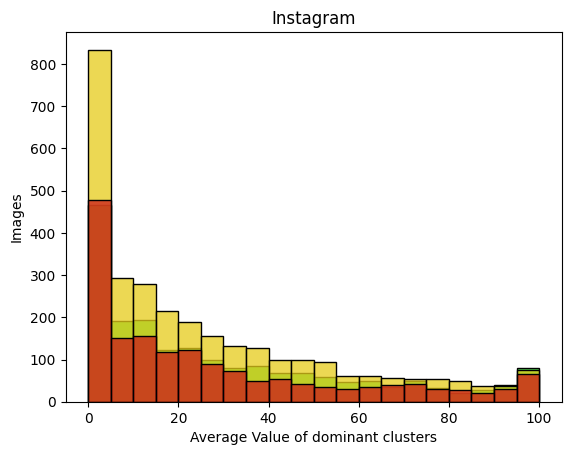

In [206]:
dom_s_pos_t = df_t_positive["dominant_s"].dropna()
dom_s_neu_t = df_t_neutral["dominant_s"].dropna()
dom_s_neg_t = df_t_negative["dominant_s"].dropna()
#print(mean_h_pos_t)
sb.histplot(dom_s_pos_t*100, color=(0.1,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(dom_s_neu_t*100, color=(0.9,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(dom_s_neg_t*100, color=(0.8,0.1,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
res = kruskal(dom_s_pos_t, dom_s_neu_t, dom_s_neg_t)
print(f"Kruskal-Wallis for all {res}")
eps = res.statistic / (len(df_total["dominant_s"].dropna()-1))
print(f"eps={eps}")


res_pos_neu = mannwhitneyu(dom_s_pos_t, dom_s_neu_t)
print(f"Mann-Whitney-U for positive-neutral: {res_pos_neu}")
effect_size_pos_neu = 1- (2*res_pos_neu.statistic)/(len(dom_s_pos_t) * len(dom_s_neu_t))
print(f"Effect size pos-neu: {effect_size_pos_neu}")

res_neg_neu = mannwhitneyu(dom_s_neg_t, dom_s_neu_t)
print(f"Mann-Whitney-U for negative-neutral: {res_neg_neu}")
effect_size_neg_neu = 1- (2*res_neg_neu.statistic)/(len(dom_s_neg_t) * len(dom_s_neu_t))
print(f"Effect size pos-neu: {effect_size_neg_neu}")

res_pos_neg = mannwhitneyu(dom_s_pos_t, dom_s_neg_t)
print(f"Mann-Whitney-U for positive-negative: {res_pos_neg}")
effect_size_pos_neg = 1- (2*res_pos_neg.statistic)/(len(dom_s_pos_t) * len(dom_s_neg_t))
print(f"Effect size pos-neu: {effect_size_pos_neg}")


print(f"Mean for positive : {np.mean(dom_s_pos_t)}")
print(f"Mean for neutral : {np.mean(dom_s_neu_t)}")
print(f"Mean for negative : {np.mean(dom_s_neg_t)}")

Kruskal-Wallis for all KruskalResult(statistic=26.651289757467556, pvalue=1.632096980709164e-06)
eps=0.004024050997654772
Mann-Whitney-U for positive-neutral: MannwhitneyuResult(statistic=3161096.5, pvalue=4.75927589579528e-07)
Effect size pos-neu: -0.08464316037731812
Mann-Whitney-U for negative-neutral: MannwhitneyuResult(statistic=2652731.5, pvalue=0.00296424359523994)
Effect size pos-neu: -0.01065045734491843
Mann-Whitney-U for positive-negative: MannwhitneyuResult(statistic=1681055.0, pvalue=0.0998578375621626)
Effect size pos-neu: -0.04709477532411621
Mean for positive : 0.577037306421796
Mean for neutral : 0.5306419071124954
Mean for negative : 0.5594915274030995


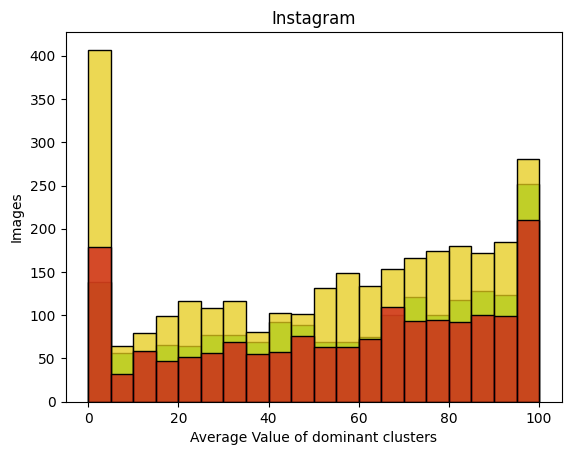

In [207]:
dom_v_pos_t = df_t_positive["dominant_v"].dropna()
dom_v_neu_t = df_t_neutral["dominant_v"].dropna()
dom_v_neg_t = df_t_negative["dominant_v"].dropna()
#print(mean_h_pos_t)
sb.histplot(dom_v_pos_t*100, color=(0.1,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(dom_v_neu_t*100, color=(0.9,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(dom_v_neg_t*100, color=(0.8,0.1,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
res = kruskal(dom_v_pos_t, dom_v_neu_t, dom_v_neg_t)
print(f"Kruskal-Wallis for all {res}")
eps = res.statistic / (len(df_total["dominant_v"].dropna()-1))
print(f"eps={eps}")

res_pos_neu = mannwhitneyu(dom_v_pos_t, dom_v_neu_t)
print(f"Mann-Whitney-U for positive-neutral: {res_pos_neu}")
effect_size_pos_neu = 1- (2*res_pos_neu.statistic)/(len(dom_v_pos_t) * len(dom_v_neu_t))
print(f"Effect size pos-neu: {effect_size_pos_neu}")

res_neg_neu = mannwhitneyu(dom_v_neg_t, dom_v_neu_t)
print(f"Mann-Whitney-U for negative-neutral: {res_neg_neu}")
effect_size_pos_neu = 1- (2*res_neg_neu.statistic)/(len(dom_v_neg_t) * len(dom_v_neu_t))
print(f"Effect size pos-neu: {effect_size_neg_neu}")

res_pos_neg = mannwhitneyu(dom_v_pos_t, dom_v_neg_t)
print(f"Mann-Whitney-U for positive-negative: {res_pos_neg}")
effect_size_pos_neu = 1- (2*res_pos_neg.statistic)/(len(dom_v_pos_t) * len(dom_v_neg_t))
print(f"Effect size pos-neu: {effect_size_pos_neg}")

print(f"Mean for positive : {np.mean(dom_v_pos_t)}")
print(f"Mean for neutral : {np.mean(dom_v_neu_t)}")
print(f"Mean for negative : {np.mean(dom_v_neg_t)}")

### Visual sentiment. Same thing

In [208]:
print(df_total["Impression_or_Sentiment"].unique())

df_v_positive = df_total.loc[df_total["Impression_or_Sentiment"] == "Positive"]
df_v_neutral = df_total.loc[df_total["Impression_or_Sentiment"] == "Neutral"]
df_v_negative = df_total.loc[df_total["Impression_or_Sentiment"] == "Negative"]

['Neutral' 'Negative' 'Positive' nan]


##### Hue

15      0.312974
19      0.183423
33      0.199648
37      0.245944
40      0.243355
          ...   
6869    0.344437
6886    0.320867
6887    0.523139
6889    0.136219
6900    0.326532
Name: mean_h, Length: 949, dtype: float64
Kruskal-Wallis for all KruskalResult(statistic=28.34837210565119, pvalue=6.98601014191948e-07)
eps=0.004110246789278119
Mann-Whitney-U for positive-neutral: MannwhitneyuResult(statistic=1417170.0, pvalue=0.00014286893312603997)
Effect size pos-neu: 0.08102780254518926
Mann-Whitney-U for negative-neutral: MannwhitneyuResult(statistic=3643831.5, pvalue=2.191687796798017e-06)
Effect size pos-neu: -0.01065045734491843
Mann-Whitney-U for positive-negative: MannwhitneyuResult(statistic=1417170.0, pvalue=0.00014286893312603997)
Effect size pos-neu: -0.23415687674716312
Mean for positive : 118.54489135565726
Mean for neutral : 127.62940940525966
Mean for negative : 119.27909740820417


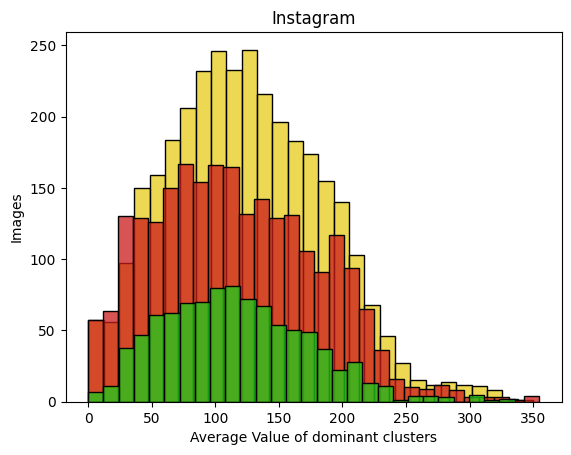

In [211]:
mean_h_pos_v = df_v_positive["mean_h"].dropna()
mean_h_neu_v = df_v_neutral["mean_h"].dropna()
mean_h_neg_v = df_v_negative["mean_h"].dropna()
print(mean_h_pos_v)
sb.histplot(mean_h_neu_v*360%360, color=(0.9,0.8,0.1), binwidth=12).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(mean_h_neg_v*360%360, color=(0.8,0.1,0.1), binwidth=12).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(mean_h_pos_v*360%360, color=(0.1,0.8,0.1), binwidth=12).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")

res = kruskal(mean_h_pos_v, mean_h_neu_v, mean_h_neg_v)

print(f"Kruskal-Wallis for all {res}")
eps = res.statistic / (sum([len(df_v_positive["mean_h"]), len(df_v_neutral["mean_h"]), len(df_v_negative["mean_h"])]))
print(f"eps={eps}")

res_pos_neu = mannwhitneyu(mean_h_pos_v, mean_h_neu_v)
print(f"Mann-Whitney-U for positive-neutral: {res_pos_neu}")
effect_size_pos_neu = 1- (2*res_pos_neu.statistic)/(len(mean_h_pos_v) * len(mean_h_neu_v))
print(f"Effect size pos-neu: {effect_size_pos_neu}")

res_neg_neu = mannwhitneyu(mean_h_neg_v, mean_h_neu_v)
print(f"Mann-Whitney-U for negative-neutral: {res_neg_neu}")
effect_size_pos_neu = 1- (2*res_neg_neu.statistic)/(len(mean_h_neg_v) * len(mean_h_neu_v))
print(f"Effect size pos-neu: {effect_size_neg_neu}")

res_pos_neg = mannwhitneyu(mean_h_pos_v, mean_h_neu_v)
print(f"Mann-Whitney-U for positive-negative: {res_pos_neu}")
effect_size_pos_neg = 1- (2*res_pos_neg.statistic)/(len(mean_h_pos_v) * len(mean_h_neg_v))
print(f"Effect size pos-neu: {effect_size_pos_neg}")


print(f"Mean for positive : {np.mean(mean_h_pos_v)*360}")
print(f"Mean for neutral : {np.mean(mean_h_neu_v)*360}")
print(f"Mean for negative : {np.mean(mean_h_neg_v)*360}")

##### Saturation

15      0.312974
19      0.183423
33      0.199648
37      0.245944
40      0.243355
          ...   
6869    0.344437
6886    0.320867
6887    0.523139
6889    0.136219
6900    0.326532
Name: mean_h, Length: 949, dtype: float64
Kruskal-Wallis for all KruskalResult(statistic=37.18214275672324, pvalue=8.433353164503824e-09)
eps=0.005391060280806617
Mann-Whitney-U for positive-neutral: MannwhitneyuResult(statistic=1720891.0, pvalue=5.2996074335260436e-08)
Effect size pos-neu: -0.11592186106833102
Mann-Whitney-U for negative-neutral: MannwhitneyuResult(statistic=3868582.5, pvalue=0.29445317751606637)
Effect size pos-neu: -0.01065045734491843
Mann-Whitney-U for positive-negative: MannwhitneyuResult(statistic=1297029.5, pvalue=4.718865120474694e-09)
Effect size pos-neu: -0.12953130306804028
Mean for positive : 33.31690298929
Mean for neutral : 30.475137222147463
Mean for negative : 30.26010046835545


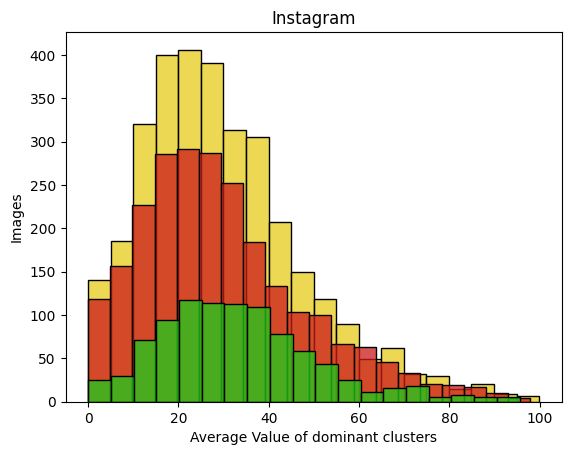

In [212]:
mean_s_pos_v = df_v_positive["mean_s"].dropna()
mean_s_neu_v = df_v_neutral["mean_s"].dropna()
mean_s_neg_v = df_v_negative["mean_s"].dropna()
print(mean_h_pos_v)
sb.histplot(mean_s_neu_v*100%100, color=(0.9,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(mean_s_neg_v*100%100, color=(0.8,0.1,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(mean_s_pos_v*100%100, color=(0.1,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")

res = kruskal(mean_s_pos_v, mean_s_neu_v, mean_s_neg_v)

print(f"Kruskal-Wallis for all {res}")
eps = res.statistic / (sum([len(df_v_positive["mean_s"]), len(df_v_neutral["mean_s"]), len(df_v_negative["mean_s"])]))
print(f"eps={eps}")

res_pos_neu = mannwhitneyu(mean_s_pos_v, mean_s_neu_v)
print(f"Mann-Whitney-U for positive-neutral: {res_pos_neu}")
effect_size_pos_neu = 1- (2*res_pos_neu.statistic)/(len(mean_s_pos_v) * len(mean_s_neu_v))
print(f"Effect size pos-neu: {effect_size_pos_neu}")

res_neg_neu = mannwhitneyu(mean_s_neg_v, mean_s_neu_v)
print(f"Mann-Whitney-U for negative-neutral: {res_neg_neu}")
effect_size_pos_neu = 1- (2*res_neg_neu.statistic)/(len(mean_s_neg_v) * len(mean_s_neu_v))
print(f"Effect size pos-neu: {effect_size_neg_neu}")

res_pos_neg = mannwhitneyu(mean_s_pos_v, mean_s_neg_v)
print(f"Mann-Whitney-U for positive-negative: {res_pos_neg}")
effect_size_pos_neg = 1- (2*res_pos_neg.statistic)/(len(mean_s_pos_v) * len(mean_s_neg_v))
print(f"Effect size pos-neu: {effect_size_pos_neg}")


print(f"Mean for positive : {np.mean(mean_s_pos_v)*100}")
print(f"Mean for neutral : {np.mean(mean_s_neu_v)*100}")
print(f"Mean for negative : {np.mean(mean_s_neg_v)*100}")

##### Value

15      0.312974
19      0.183423
33      0.199648
37      0.245944
40      0.243355
          ...   
6869    0.344437
6886    0.320867
6887    0.523139
6889    0.136219
6900    0.326532
Name: mean_h, Length: 949, dtype: float64
Kruskal-Wallis for all KruskalResult(statistic=13.845042345960474, pvalue=0.0009853425872176093)
eps=0.0020074006591214257
Mann-Whitney-U for positive-neutral: MannwhitneyuResult(statistic=1660532.5, pvalue=0.0003135192637195101)
Effect size pos-neu: -0.0767820377725541
Mann-Whitney-U for negative-neutral: MannwhitneyuResult(statistic=4062593.5, pvalue=0.03285446109586568)
Effect size pos-neu: -0.01065045734491843
Mann-Whitney-U for positive-negative: MannwhitneyuResult(statistic=1194828.0, pvalue=0.06688074447930906)
Effect size pos-neu: -0.04052808959409204
Effect size: -0.0767820377725541
Mean for positive : 57.97064746972052
Mean for neutral : 55.37486093596543
Mean for negative : 56.25495050034852


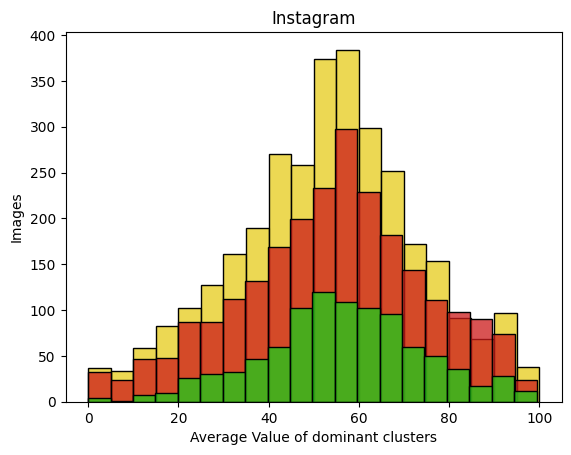

In [214]:
mean_v_pos_v = df_v_positive["mean_v"].dropna()
mean_v_neu_v = df_v_neutral["mean_v"].dropna()
mean_v_neg_v = df_v_negative["mean_v"].dropna()
print(mean_h_pos_v)
sb.histplot(mean_v_neu_v*100%100, color=(0.9,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(mean_v_neg_v*100%100, color=(0.8,0.1,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(mean_v_pos_v*100%100, color=(0.1,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")

res = kruskal(mean_v_pos_v, mean_v_neu_v, mean_v_neg_v)

print(f"Kruskal-Wallis for all {res}")
eps = res.statistic / (sum([len(df_v_positive["mean_v"]), len(df_v_neutral["mean_v"]), len(df_v_negative["mean_v"])]))
print(f"eps={eps}")

res_pos_neu = mannwhitneyu(mean_v_pos_v, mean_v_neu_v)
print(f"Mann-Whitney-U for positive-neutral: {res_pos_neu}")
effect_size_pos_neu = 1- (2*res_pos_neu.statistic)/(len(mean_v_pos_v) * len(mean_v_neu_v))
print(f"Effect size pos-neu: {effect_size_pos_neu}")

res_neg_neu = mannwhitneyu(mean_v_neg_v, mean_v_neu_v)
print(f"Mann-Whitney-U for negative-neutral: {res_neg_neu}")
effect_size_pos_neu = 1- (2*res_neg_neu.statistic)/(len(mean_v_neg_v) * len(mean_v_neu_v))
print(f"Effect size pos-neu: {effect_size_neg_neu}")

res_pos_neg = mannwhitneyu(mean_v_pos_v, mean_v_neg_v)
print(f"Mann-Whitney-U for positive-negative: {res_pos_neg}")
effect_size_pos_neg = 1- (2*res_pos_neg.statistic)/(len(mean_v_pos_v) * len(mean_v_neg_v))
print(f"Effect size pos-neu: {effect_size_pos_neg}")

mwu_stat = res_pos_neu.statistic
p = res_pos_neu.pvalue

effect_size = 1- (2*mwu_stat)/(len(mean_v_pos_v) * len(mean_v_neu_v))
print(f"Effect size: {effect_size}")

print(f"Mean for positive : {np.mean(mean_v_pos_v)*100}")
print(f"Mean for neutral : {np.mean(mean_v_neu_v)*100}")
print(f"Mean for negative : {np.mean(mean_v_neg_v)*100}")

### Visual sentiment for the most dominant colors in an image

15      0.312974
19      0.183423
33      0.199648
37      0.245944
40      0.243355
          ...   
6869    0.344437
6886    0.320867
6887    0.523139
6889    0.136219
6900    0.326532
Name: mean_h, Length: 949, dtype: float64
Kruskal-Wallis for all KruskalResult(statistic=13.076092640917496, pvalue=0.0014473133251526667)
eps=0.001895910198770117
Mann-Whitney-U for positive-neutral: MannwhitneyuResult(statistic=1515033.5, pvalue=0.40826354208877824)
Effect size pos-neu: 0.01756764205236283
Mann-Whitney-U for negative-neutral: MannwhitneyuResult(statistic=3717407.0, pvalue=0.00039553587477793794)
Effect size pos-neu: 0.01756764205236283
Mann-Whitney-U for positive-negative: MannwhitneyuResult(statistic=1197350.5, pvalue=0.05239628093164889)
Effect size pos-neu: -0.04272483431885665
Effect size: 0.05469624920534011
Mean for positive : 98.6896423479824
Mean for neutral : 109.29035294117647
Mean for negative : 101.35974720466699


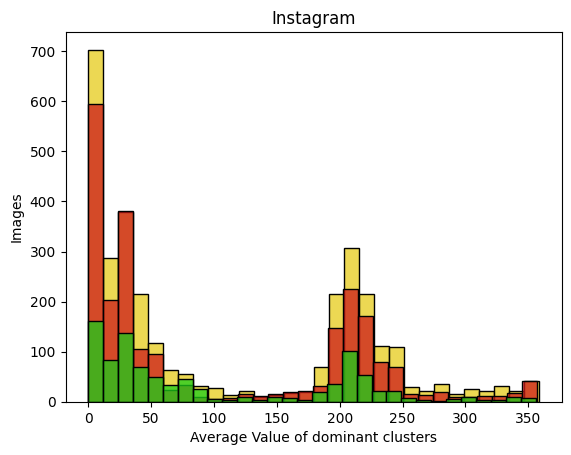

In [215]:
dom_h_pos_v = df_v_positive["dominant_h"].dropna()
dom_h_neu_v = df_v_neutral["dominant_h"].dropna()
dom_h_neg_v = df_v_negative["dominant_h"].dropna()
print(mean_h_pos_v)
sb.histplot(dom_h_neu_v*360%360, color=(0.9,0.8,0.1), binwidth=12).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(dom_h_neg_v*360%360, color=(0.8,0.1,0.1), binwidth=12).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(dom_h_pos_v*360%360, color=(0.1,0.8,0.1), binwidth=12).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")

res = kruskal(dom_h_pos_v, dom_h_neu_v, dom_h_neg_v)

print(f"Kruskal-Wallis for all {res}")
eps = res.statistic / (sum([len(df_v_positive["dominant_h"]), len(df_v_neutral["dominant_h"]), len(df_v_negative["dominant_h"])]))
print(f"eps={eps}")

res_pos_neu = mannwhitneyu(dom_h_pos_v, dom_h_neu_v)
print(f"Mann-Whitney-U for positive-neutral: {res_pos_neu}")
effect_size_pos_neu = 1- (2*res_pos_neu.statistic)/(len(dom_h_pos_v) * len(dom_h_neu_v))
print(f"Effect size pos-neu: {effect_size_pos_neu}")

res_neg_neu = mannwhitneyu(dom_h_neg_v, dom_h_neu_v)
print(f"Mann-Whitney-U for negative-neutral: {res_neg_neu}")
effect_size_neg_neu = 1- (2*res_neg_neu.statistic)/(len(dom_h_neg_v) * len(dom_h_neu_v))
print(f"Effect size pos-neu: {effect_size_pos_neu}")

res_pos_neg = mannwhitneyu(dom_h_pos_v, dom_h_neg_v)
print(f"Mann-Whitney-U for positive-negative: {res_pos_neg}")
effect_size_pos_neg = 1- (2*res_pos_neg.statistic)/(len(dom_h_pos_v) * len(dom_h_neg_v))
print(f"Effect size pos-neu: {effect_size_pos_neg}")

mwu_stat = res_neg_neu.statistic
p = res_neg_neu.pvalue

effect_size = 1- (2*mwu_stat)/(len(dom_h_neg_v) * len(dom_h_neu_v))
print(f"Effect size: {effect_size}")

print(f"Mean for positive : {np.mean(dom_h_pos_v)*360}")
print(f"Mean for neutral : {np.mean(dom_h_neu_v)*360}")
print(f"Mean for negative : {np.mean(dom_h_neg_v)*360}")

##### Saturation

15      0.312974
19      0.183423
33      0.199648
37      0.245944
40      0.243355
          ...   
6869    0.344437
6886    0.320867
6887    0.523139
6889    0.136219
6900    0.326532
Name: mean_h, Length: 949, dtype: float64
Kruskal-Wallis for all KruskalResult(statistic=35.289692287469954, pvalue=2.1724044600261436e-08)
eps=0.005116672797951276
Mann-Whitney-U for positive-neutral: MannwhitneyuResult(statistic=1716551.0, pvalue=1.0210623698493635e-07)
Effect size pos-neu: -0.11310756261651944
Mann-Whitney-U for negative-neutral: MannwhitneyuResult(statistic=3868291.5, pvalue=0.29037757168043354)
Effect size pos-neu: -0.11310756261651944
Mann-Whitney-U for positive-negative: MannwhitneyuResult(statistic=1291665.5, pvalue=1.4482368931135555e-08)
Effect size pos-neu: -0.12486000923111762
Effect size: -0.12486000923111762
Mean for positive : 31.458707824541825
Mean for neutral : 26.62877828054298
Mean for negative : 26.843866472208717


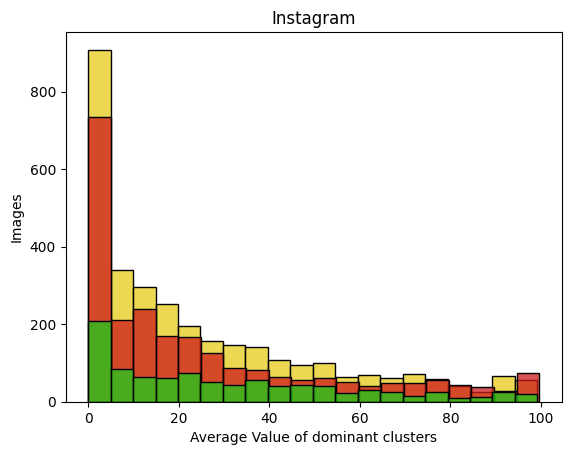

In [216]:
dom_s_pos_v = df_v_positive["dominant_s"].dropna()
dom_s_neu_v = df_v_neutral["dominant_s"].dropna()
dom_s_neg_v = df_v_negative["dominant_s"].dropna()
print(mean_h_pos_v)
sb.histplot(dom_s_neu_v*100%100, color=(0.9,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(dom_s_neg_v*100%100, color=(0.8,0.1,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(dom_s_pos_v*100%100, color=(0.1,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")

res = kruskal(dom_s_pos_v, dom_s_neu_v, dom_s_neg_v)

print(f"Kruskal-Wallis for all {res}")
eps = res.statistic / (sum([len(df_v_positive["dominant_s"]), len(df_v_neutral["dominant_s"]), len(df_v_negative["dominant_h"])]))
print(f"eps={eps}")

res_pos_neu = mannwhitneyu(dom_s_pos_v, dom_s_neu_v)
print(f"Mann-Whitney-U for positive-neutral: {res_pos_neu}")
effect_size_pos_neu = 1- (2*res_pos_neu.statistic)/(len(dom_s_pos_v) * len(dom_s_neu_v))
print(f"Effect size pos-neu: {effect_size_pos_neu}")

res_neg_neu = mannwhitneyu(dom_s_neg_v, dom_s_neu_v)
print(f"Mann-Whitney-U for negative-neutral: {res_neg_neu}")
effect_size_neg_neu = 1- (2*res_neg_neu.statistic)/(len(dom_s_neg_v) * len(dom_s_neu_v))
print(f"Effect size pos-neu: {effect_size_pos_neu}")

res_pos_neg = mannwhitneyu(dom_s_pos_v, dom_s_neg_v)
print(f"Mann-Whitney-U for positive-negative: {res_pos_neg}")
effect_size_pos_neg = 1- (2*res_pos_neg.statistic)/(len(dom_s_pos_v) * len(dom_s_neg_v))
print(f"Effect size pos-neu: {effect_size_pos_neg}")

mwu_stat = res_pos_neg.statistic
p = res_pos_neg.pvalue

effect_size = 1- (2*mwu_stat)/(len(dom_s_pos_v) * len(dom_s_neg_v))
print(f"Effect size: {effect_size}")

print(f"Mean for positive : {np.mean(dom_s_pos_v)*100}")
print(f"Mean for neutral : {np.mean(dom_s_neu_v)*100}")
print(f"Mean for negative : {np.mean(dom_s_neg_v)*100}")

15      0.569595
19      0.310292
33      0.514170
37      0.196564
40      0.239867
          ...   
6869    0.705508
6886    0.601411
6887    0.618430
6889    0.525624
6900    0.456237
Name: mean_v, Length: 949, dtype: float64
Kruskal-Wallis for all KruskalResult(statistic=17.38895138670411, pvalue=0.00016750862870788366)
eps=0.0025212340708574902
Mann-Whitney-U for positive-neutral: MannwhitneyuResult(statistic=1678703.5, pvalue=3.204064977520345e-05)
Effect size pos-neu: -0.088565129285888
Mann-Whitney-U for negative-neutral: MannwhitneyuResult(statistic=3974811.5, pvalue=0.4874036725042228)
Effect size pos-neu: -0.088565129285888
Mann-Whitney-U for positive-negative: MannwhitneyuResult(statistic=1235463.0, pvalue=0.0005944849335838197)
Effect size pos-neu: -0.07591549173118284
Effect size: -0.088565129285888
Mean for positive : 59.31093617636727
Mean for neutral : 54.26527903469079
Mean for negative : 54.702641387133376


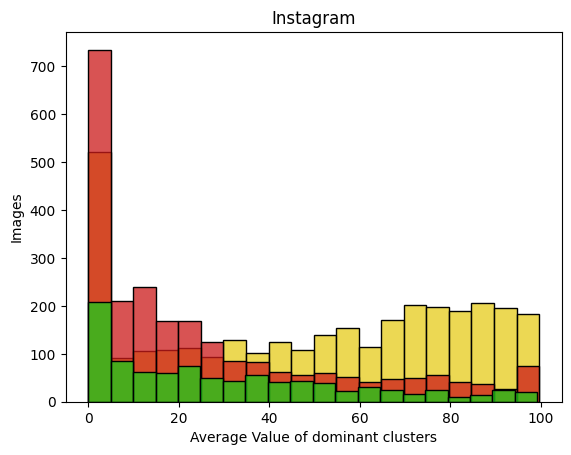

In [217]:
dom_v_pos_v = df_v_positive["dominant_v"].dropna()
dom_v_neu_v = df_v_neutral["dominant_v"].dropna()
dom_v_neg_v = df_v_negative["dominant_v"].dropna()
print(mean_v_pos_v)
sb.histplot(dom_v_neu_v*100%100, color=(0.9,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(dom_s_neg_v*100%100, color=(0.8,0.1,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(dom_s_pos_v*100%100, color=(0.1,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")

res = kruskal(dom_v_pos_v, dom_v_neu_v, dom_v_neg_v)

print(f"Kruskal-Wallis for all {res}")
eps = res.statistic / (sum([len(df_v_positive["dominant_v"]), len(df_v_neutral["dominant_v"]), len(df_v_negative["dominant_v"])]))
print(f"eps={eps}")

res_pos_neu = mannwhitneyu(dom_v_pos_v, dom_v_neu_v)
print(f"Mann-Whitney-U for positive-neutral: {res_pos_neu}")
effect_size_pos_neu = 1- (2*res_pos_neu.statistic)/(len(dom_v_pos_v) * len(dom_v_neu_v))
print(f"Effect size pos-neu: {effect_size_pos_neu}")

res_neg_neu = mannwhitneyu(dom_v_neg_v, dom_v_neu_v)
print(f"Mann-Whitney-U for negative-neutral: {res_neg_neu}")
effect_size_neg_neu = 1- (2*res_neg_neu.statistic)/(len(dom_v_neg_v) * len(dom_v_neu_v))
print(f"Effect size pos-neu: {effect_size_pos_neu}")

res_pos_neg = mannwhitneyu(dom_v_pos_v, dom_v_neg_v)
print(f"Mann-Whitney-U for positive-negative: {res_pos_neg}")
effect_size_pos_neg = 1- (2*res_pos_neg.statistic)/(len(dom_v_pos_v) * len(dom_v_neg_v))
print(f"Effect size pos-neu: {effect_size_pos_neg}")
''
mwu_stat = res_pos_neu.statistic
p = res_pos_neu.pvalue

effect_size = 1- (2*mwu_stat)/(len(dom_v_pos_v) * len(dom_v_neu_v))
print(f"Effect size: {effect_size}")

print(f"Mean for positive : {np.mean(dom_v_pos_v)*100}")
print(f"Mean for neutral : {np.mean(dom_v_neu_v)*100}")
print(f"Mean for negative : {np.mean(dom_v_neg_v)*100}")

### Effects of textual sentiment on overall frequency of colornames

In [129]:
dfc_t_positive = df_complete.loc[df_complete["Sentiment"] == "positive"]
dfc_t_neutral = df_complete.loc[df_complete["Sentiment"] == "neutral"]
dfc_t_negative = df_complete.loc[df_complete["Sentiment"] == "negative"]
print(f"positive posts:{len(dfc_t_positive)}")
print(f"neutral posts:{len(dfc_t_neutral)}")
print(f"negative posts:{len(dfc_t_negative)}")


positive posts:1941
neutral posts:3003
negative posts:1679


In [218]:
for colorname in colornames:
    print(f"\n\nSTATISTICAL TESTS FOR THE COLOR {colorname.upper()}")
    color_pos_t = dfc_t_positive[colorname].dropna()
    color_neu_t = dfc_t_neutral[colorname].dropna()
    color_neg_t = dfc_t_negative[colorname].dropna()

    res = kruskal(color_pos_t, color_neu_t, color_neg_t)
    H = res.statistic
    p = res.pvalue
    print(f"H={H}, p={p}")
    print("This is significant!") if p < 0.05 else print("")
    eps = H / (sum([len(color_pos_t), len(color_neu_t), len(color_neg_t)]))
    print(f"eps={eps}")

    res_pos_neu = mannwhitneyu(color_pos_t, color_neu_t)
    print(f"Mann-Whitney-U for positive-neutral: {res_pos_neu}")
    effect_size_pos_neu = 1- (2*res_pos_neu.statistic)/(len(color_pos_t) * len(color_neu_t))
    print(f"Effect size positive-neutral: {effect_size_pos_neu}")

    

    res_neg_neu = mannwhitneyu(color_neg_t, color_neu_t)
    print(f"Mann-Whitney-U for negative-neutral: {res_neg_neu}")
    effect_size_neg_neu = 1- (2*res_neg_neu.statistic)/(len(color_neg_t) * len(color_neu_t))
    print(f"Effect size negative-neutral: {effect_size_neg_neu}")

    res_pos_neg = mannwhitneyu(color_pos_t, color_neg_t)
    print(f"Mann-Whitney-U for positive-negative: {res_pos_neg}")
    effect_size_pos_neg = 1- (2*res_pos_neg.statistic)/(len(color_pos_t) * len(color_neg_t))
    print(f"Effect size positive-neutral: {effect_size_pos_neg}")

    
    
    print(f"Mean for positive : {np.mean(color_pos_t)}")
    print(f"Mean for neutral : {np.mean(color_neu_t)}")
    print(f"Mean for negative : {np.mean(color_neg_t)}")

    



STATISTICAL TESTS FOR THE COLOR BLACK
H=37.19026693176666, p=8.39916562923775e-09
This is significant!
eps=0.0056153203883084184
Mann-Whitney-U for positive-neutral: MannwhitneyuResult(statistic=2637644.0, pvalue=3.3923986274669433e-09)
Effect size positive-neutral: 0.09496514133299294
Mann-Whitney-U for negative-neutral: MannwhitneyuResult(statistic=2369837.0, pvalue=0.0003789405502805248)
Effect size negative-neutral: 0.059968421493138635
Mann-Whitney-U for positive-negative: MannwhitneyuResult(statistic=1571345.0, pvalue=0.0505505749686907)
Effect size positive-neutral: 0.035670811880799236
Mean for positive : 0.11349345943472212
Mean for neutral : 0.1624644764214947
Mean for negative : 0.12925489743678703


STATISTICAL TESTS FOR THE COLOR GRAY
H=2.0257224285880473, p=0.3631783604480969

eps=0.0003058617588084021
Mann-Whitney-U for positive-neutral: MannwhitneyuResult(statistic=2847205.5, pvalue=0.1692938270285067)
Effect size positive-neutral: 0.023059887047522265
Mann-Whitney-U 

##### Visual Sentiment

In [219]:
dfc_v_positive = df_complete.loc[df_complete["Impression_or_Sentiment"] == "Positive"]
dfc_v_neutral = df_complete.loc[df_complete["Impression_or_Sentiment"] == "Neutral"]
dfc_v_negative = df_complete.loc[df_complete["Impression_or_Sentiment"] == "Negative"]
print(f"positive posts:{len(dfc_v_positive)}")
print(f"neutral posts:{len(dfc_v_neutral)}")
print(f"negative posts:{len(dfc_v_negative)}")



positive posts:949
neutral posts:3250
negative posts:2420


In [220]:
for colorname in colornames:
    print(f"\n\nSTATISTICAL TESTS FOR THE COLOR {colorname.upper()}")
    color_pos_t = dfc_v_positive[colorname].dropna()
    color_neu_t = dfc_v_neutral[colorname].dropna()
    color_neg_t = dfc_v_negative[colorname].dropna()

    res = kruskal(color_pos_t, color_neu_t, color_neg_t)
    H = res.statistic
    p = res.pvalue
    print(f"H={H}, p={p}")
    print("This is significant!") if p < 0.05 else print("")
    eps = H / (sum([len(color_pos_t), len(color_neu_t), len(color_neg_t)]))
    print(f"eps={eps}")

    res_pos_neu = mannwhitneyu(color_pos_t, color_neu_t)
    print(f"Mann-Whitney-U for positive-neutral: {res_pos_neu}")
    effect_size_pos_neu = 1- (2*res_pos_neu.statistic)/(len(color_pos_t) * len(color_neu_t))
    print(f"Effect size positive-neutral: {effect_size_pos_neu}")

    

    res_neg_neu = mannwhitneyu(color_neg_t, color_neu_t)
    print(f"Mann-Whitney-U for negative-neutral: {res_neg_neu}")
    effect_size_neg_neu = 1- (2*res_neg_neu.statistic)/(len(color_neg_t) * len(color_neu_t))
    print(f"Effect size negative-neutral: {effect_size_neg_neu}")

    res_pos_neg = mannwhitneyu(color_pos_t, color_neg_t)
    print(f"Mann-Whitney-U for positive-negative: {res_pos_neg}")
    effect_size_pos_neg = 1- (2*res_pos_neg.statistic)/(len(color_pos_t) * len(color_neg_t))
    print(f"Effect size positive-neutral: {effect_size_pos_neg}")

    
    print(f"Mean for positive : {np.mean(color_pos_t)}")
    print(f"Mean for neutral : {np.mean(color_neu_t)}")
    print(f"Mean for negative : {np.mean(color_neg_t)}")



STATISTICAL TESTS FOR THE COLOR BLACK
H=39.66592595916108, p=2.4358672599310896e-09
This is significant!
eps=0.0059927369631607615
Mann-Whitney-U for positive-neutral: MannwhitneyuResult(statistic=1343836.0, pvalue=2.619482362461262e-10)
Effect size positive-neutral: 0.128581664910432
Mann-Whitney-U for negative-neutral: MannwhitneyuResult(statistic=3820449.5, pvalue=0.05480547321582759)
Effect size negative-neutral: 0.02849345200254294
Mann-Whitney-U for positive-negative: MannwhitneyuResult(statistic=1034893.0, pvalue=2.6036262502866987e-06)
Effect size positive-neutral: 0.09875292826724957
Mean for positive : 0.08263618474004641
Mean for neutral : 0.15509719558403925
Mean for negative : 0.1415882455252176


STATISTICAL TESTS FOR THE COLOR GRAY
H=9.338229052792073, p=0.009380572099593407
This is significant!
eps=0.0014108217333119917
Mann-Whitney-U for positive-neutral: MannwhitneyuResult(statistic=1450707.5, pvalue=0.005281464214902133)
Effect size positive-neutral: 0.059280213990

##### Effects of Platform on colorname frequency

In [221]:
dfc_instagram = df_complete.loc[df_complete["platform_x"] == "instagram"]
dfc_tiktok = df_complete.loc[df_complete["platform_x"] == "tiktok"]

print(f"Insta posts: {len(dfc_instagram)}")
print(f"Tiktok posts: {len(dfc_tiktok)}")

Insta posts: 3802
Tiktok posts: 2821


In [222]:
for colorname in colornames:
    print(f"\n\nSTATISTICAL TESTS FOR THE COLOR {colorname.upper()}")
    color_ig = dfc_instagram [colorname].dropna()
    color_tt = dfc_tiktok[colorname].dropna()

    res = mannwhitneyu(color_ig, color_tt)
    z = res.statistic
    p=res.pvalue
    print(f"Mann-Whitney-U test: (z={z}, p={p})")
    if p < 0.05:
        print("This is significant!")
    effect_size = 1- (2*z)/(len(color_ig) * len(color_tt))
    print(f"Effect size: {effect_size}")

    
    print(f"Mean for Instagram: {np.mean(color_ig)}")
    print(f"Mean for Tiktok: {np.mean(color_tt)}")



STATISTICAL TESTS FOR THE COLOR BLACK
Mann-Whitney-U test: (z=3905559.0, p=1.4429458148316598e-87)
This is significant!
Effect size: 0.2717206433077537
Mean for Instagram: 0.08656790332874109
Mean for Tiktok: 0.2112936660039121


STATISTICAL TESTS FOR THE COLOR GRAY
Mann-Whitney-U test: (z=5116794.0, p=0.0013554179493636682)
This is significant!
Effect size: 0.04585862288938769
Mean for Instagram: 0.24633067002504103
Mean for Tiktok: 0.2643041165024233


STATISTICAL TESTS FOR THE COLOR WHITE
Mann-Whitney-U test: (z=6148435.0, p=7.031969728207918e-32)
This is significant!
Effect size: -0.14651405508509585
Mean for Instagram: 0.1307562411736442
Mean for Tiktok: 0.05623148836612682


STATISTICAL TESTS FOR THE COLOR ORANGE
Mann-Whitney-U test: (z=4307748.0, p=1.565068782433487e-46)
This is significant!
Effect size: 0.1967234543807146
Mean for Instagram: 0.06923245047865673
Mean for Tiktok: 0.10359682358093433


STATISTICAL TESTS FOR THE COLOR ORANGE-YELLOW
Mann-Whitney-U test: (z=4939478

## Hashtags and Color

In [136]:
hashtags = df_total["Hashtag"].unique()
dfs_per_hashtag = {}
for hashtag in hashtags:
    print(hashtag,":")
    print(len(df_total.loc[df_total["Hashtag"] == hashtag]))
    dfs_per_hashtag[hashtag] = df_total.loc[df_total["Hashtag"] == hashtag]

print(dfs_per_hashtag["klimawandel"])
    


climatechange :
1035
climatecrisis :
1167
klimakrise :
1283
klimaschutz :
1249
klimawandel :
1313
savetheplanet :
858
                                   id                 Filename  \
2577                    klimawandel_1        klimawandel_1.jpg   
2578                    klimawandel_2        klimawandel_2.jpg   
2579                    klimawandel_3        klimawandel_3.jpg   
2580                    klimawandel_4        klimawandel_4.jpg   
2581                    klimawandel_5        klimawandel_5.jpg   
...                               ...                      ...   
6574  klimawandel_7086125814005255430  7086125814005255430.jpg   
6575  klimawandel_7210319548384283909  7210319548384283909.jpg   
6576  klimawandel_6981510960070610182  6981510960070610182.jpg   
6577  klimawandel_7011161118722854150  7011161118722854150.jpg   
6578  klimawandel_7086480885653998854  7086480885653998854.jpg   

                         Account  \
2577  Faktastisch - Das Original   
2578             

In [224]:
dependent_variables=["mean_h", "mean_s", "mean_v"]

for dv in dependent_variables:
    print(f"\n\nSTATISTICAL TESTS FOR {dv.upper()}")
    samples = []
    samplesize = 0
    for hashtag in hashtags:
        samples.append(dfs_per_hashtag[hashtag].dropna()[dv].to_numpy())
        print(hashtag, ":" ,len(dfs_per_hashtag[hashtag].dropna()[dv].to_numpy()))
        samplesize += len(dfs_per_hashtag[hashtag].dropna()[dv].to_numpy())
    #samples_tuple = tuple(samples)
    #print(samples_tuple)
    print(len(samples))
    res = kruskal(*samples)
    print(res)
    H = res.statistic
    p = res.pvalue
    eps = H / samplesize
    print(f"Kruskal-Wallis-Test: (H={H}, p={p})")
    if p < 0.05:
        print("This is significant!")
        print(f"Effect size: {eps}")

        print("-- Post-hoc tests: --")
        for i in range(len(hashtags)):
            hashtag_x = hashtags[i]
            samples_x = dfs_per_hashtag[hashtag_x][dv].dropna()
            for j in range(i+1, len(hashtags)):
                hashtag_y = hashtags[j]
                samples_y = dfs_per_hashtag[hashtag_y][dv].dropna()
                
                res = mannwhitneyu(samples_x, samples_y)
                print(f"Mann-Whitney-U Test between #{hashtag_x} and #{hashtag_y}")
                z = res.statistic
                p=res.pvalue
                print(f"z={z}, p={p}")
                if p<0.05:
                    effect_size = 1- (2*z)/(len(samples_x) * len(samples_y))
                    print(f"Effect size: {effect_size}")
                print(f"Mean(#{hashtag_x}): {np.mean(samples_x)})")
                print(f"Mean(#{hashtag_y}): {np.mean(samples_y)})")
                    

    



STATISTICAL TESTS FOR MEAN_H
climatechange : 1029
climatecrisis : 1112
klimakrise : 1281
klimaschutz : 1172
klimawandel : 0
savetheplanet : 839
6
KruskalResult(statistic=nan, pvalue=nan)
Kruskal-Wallis-Test: (H=nan, p=nan)


STATISTICAL TESTS FOR MEAN_S
climatechange : 1029
climatecrisis : 1112
klimakrise : 1281
klimaschutz : 1172
klimawandel : 0
savetheplanet : 839
6
KruskalResult(statistic=nan, pvalue=nan)
Kruskal-Wallis-Test: (H=nan, p=nan)


STATISTICAL TESTS FOR MEAN_V
climatechange : 1029
climatecrisis : 1112
klimakrise : 1281
klimaschutz : 1172
klimawandel : 0
savetheplanet : 839
6
KruskalResult(statistic=nan, pvalue=nan)
Kruskal-Wallis-Test: (H=nan, p=nan)


## TOPICS!!!!!

In [231]:
topics = df_total["BERTopic"].unique()
topics.sort()
for topic in topics:
    count_tpc = len(df_total.loc[df_total["BERTopic"] == topic])
    print(f"There are {count_tpc} posts for {topic}")

There are 2635 posts for -1_klimawandel_klimaschutz_climatechange_klimakrise
There are 2591 posts for 0_klimaschutz_klimawandel_klimakrise_climatechange
There are 62 posts for 10_meat_fleisch_vegan_dairy
There are 68 posts for 11_maui_wildfires_fires_canada
There are 80 posts for 12_sunmoney_makemoney_makemoney savetheplanet_solar
There are 42 posts for 13_plastic_waste_plasticfree_savetheplanet
There are 37 posts for 14_thunberg_greta_greta thunberg_gretathunberg
There are 48 posts for 15_amazonas_indigenous_regenwald_lula
There are 32 posts for 16_lützerath_räumung_rwe_innen
There are 20 posts for 17_trashmaid_thelittletrashmaid_mermaid_thelittletrashmaid trashmaid
There are 29 posts for 18_wildlifephotographer_eleph ants7_eleph_ants7
There are 214 posts for 1_savetheplanet_pa_pa pa_viral
There are 195 posts for 2_ice_gletscher_schnee_antarktis
There are 128 posts for 3_heat_record_temperatures_grad
There are 156 posts for 4_congo_kinder_people_climate
There are 121 posts for 5_oil_s

In [239]:
dependent_variables_topics = ["mean_h", "dominant_h", "mean_s", "dominant_s", "mean_v", "dominant_v"]

In [241]:

for dv in dependent_variables_topics:
    print(f"\n\nSTATISTICAL TESTS FOR {dv.upper()}")
    samples = []
    samplesize = 0
    for topic in topics:
        topic_inliers = df_total.loc[df_total["BERTopic"] == topic][dv].dropna()
        samples.append(topic_inliers)
        samplesize += len(topic_inliers)
    #samples_tuple = tuple(samples)
    #print(samples_tuple)
    print(len(samples))
    res = kruskal(*samples)
    print(res)
    H = res.statistic
    p = res.pvalue
    eps = H / samplesize
    print(f"Kruskal-Wallis-Test: (H={H}, p={p})")
    if p < 0.05:
        print("This is significant!")
        print(f"Effect size: {eps}")

        print("-- Post-hoc tests: --")
        for topic in topics:
            samples_inliers = df_total.loc[df_total["BERTopic"] == topic][dv].dropna()
            samples_outliers = df_total.loc[df_total["BERTopic"] != topic][dv].dropna()
            
            res = mannwhitneyu(samples_inliers, samples_outliers)
            print(f"Mann-Whitney-U Test between Inliers and Outliers of Topic {topic}")
            z = res.statistic
            p=res.pvalue
            print(f"z={z}, p={p}")
            if p<0.05:
                effect_size = 1- (2*z)/(len(samples_inliers) * len(samples_outliers))
                print(f"Effect size: {effect_size}")
                print(f"Mean( {topic}): {np.mean(samples_inliers)})")
                print(f"Mean(not {topic}): {np.mean(samples_outliers)})")
            print("\n")
                




STATISTICAL TESTS FOR MEAN_H
20
KruskalResult(statistic=31.925301943346685, pvalue=0.0318653186528743)
Kruskal-Wallis-Test: (H=31.925301943346685, p=0.0318653186528743)
This is significant!
Effect size: 0.004820368706529772
-- Post-hoc tests: --
Mann-Whitney-U Test between Inliers and Outliers of Topic -1_klimawandel_klimaschutz_climatechange_klimakrise
z=5089701.5, p=0.22465169327554502


Mann-Whitney-U Test between Inliers and Outliers of Topic 0_klimaschutz_klimawandel_klimakrise_climatechange
z=5261190.5, p=0.0396848038500054
Effect size: -0.030244845143807986
Mean( 0_klimaschutz_klimawandel_klimakrise_climatechange): 0.3512018921957506)
Mean(not 0_klimaschutz_klimawandel_klimakrise_climatechange): 0.33715042750295915)


Mann-Whitney-U Test between Inliers and Outliers of Topic 10_meat_fleisch_vegan_dairy
z=195407.5, p=0.5942130443846918


Mann-Whitney-U Test between Inliers and Outliers of Topic 11_maui_wildfires_fires_canada
z=233812.5, p=0.3622783885759078


Mann-Whitney-U Tes